# SEE125: Error analysis and floating point approximation 

## Here fill in:
- **Group Nr.**: 47
- **Names**: Savinjith Walisadeera, Adam Herbertsson, Tobias Riedel
- **Date of hand-in**:

### In this set of exercises you will:
- Practice with error propagation
- Consider the limitations of numerical calculations
- Experiment with rounding
- Look at how numbers are represented in Python


## Exercise 1: error propagation
In the lecture we have looked at the propagation of the relative error in the case of addition and subtraction and provided an upper bound for the error. Here we give the example for multiplication. After that, you should determine, in a way similar as to the one used for multiplication, the propagation of the relative error in the case of division $x=a/b$. 
- Write your results (using the *latex* style) in a Markdown box.
- Write a few lines of python code for $a=b=1$ and relative errors of $10\%$ to test the inequality you derived AS WELL AS the one derived here for multiplication.

Here is the example for multiplication:
$$x=a\cdot b,~{\rm and~} {\tilde x} = {\tilde a}\cdot{\tilde b}$$
where, the relative errors mean that $$\delta a=({\tilde a} - a)/a, \delta b=({\tilde b} - b)/b$$
and similarly (the value to determine)
$$\delta x = ({\tilde x}-x)/x = {\tilde x}/x - 1$$<br>
$${\tilde x}/x = {\tilde a}/a \cdot {\tilde b}/b$$
$$ = (1+\delta a)\cdot(1+\delta b)$$
Thus
$$\delta x = \delta a + \Delta b + \delta a\delta b$$
Only for $\delta a\delta b << (\delta a + \delta b)$ can this be approximated as
$$|\delta x| \leq (|\delta a| + |\delta b|)$$ 

For division:
$$x=\frac{a}{b},~{\rm and~} {\tilde x} = \frac{\tilde a}{\tilde b}$$
where, the relative errors mean that $$\delta a=({\tilde a} - a)/a, \delta b=({ \tilde b } - b)/b$$
and similarly (the value to be determined)
$$\delta x = ({\tilde x}-x)/x = {\tilde x}/x - 1$$<br>
$${\tilde x}/x -1 = \frac{{\tilde a}}{\tilde b} / \frac{a}{b}-1$$

$$ = \frac{a(\delta a+1)}{a}\cdot\frac{b}{b(\delta b+1)}-1 $$

$$ = \frac{1+\delta a}{1+\delta b} - 1$$
Thus
$$ \delta x = \frac{\delta a - \delta b}{1+\delta b}$$
Only for $\delta b << 1$ can this be approximated as
$$ |\delta x| \leq \frac{|\delta a| + |\delta b|}{1-|\delta b|}$$ 



In [2]:
#Your code for testing multiplication (derived above) and division (derived by yourself).
# Multiplication
a, b = 1, 1
ap, bp = 1.1, 0.9 # 10% error

da = (ap-a)/a
db = (bp-b)/b

dx = da+db+da*db
dx1 = abs(da)+abs(db)

print('The inequality for multiplication differs by', abs(dx1)-dx)


# Division
dx = (abs(da)+abs(db))/(1-abs(db))
print('The inequality for division differs by', dx)

The inequality for multiplication differs by 0.20999999999999996
The inequality for division differs by 0.2222222222222223


## Exercise 2: underflow and overflox
There is a limit to how large a 'floating-point' number (a positive or negative number that includes a decimal point) Python can deal with. This is called 'overflow'. That is illustrated in the following code:

In [3]:
large = 2.**1021
for i in range(3):
    large *= 2
    print(i, large)

0 4.49423283715579e+307
1 8.98846567431158e+307
2 inf


Modify this code to instead investigate 'underflow' in Python. This is a limit on the smallest floating point number that Python can deal with. Make sure you start from a number that is sufficiently small in order to make your output manageable.

In [4]:
small = 2.**-1072
for i in range(3):
    small /= 2
    print(i, small)

0 1e-323
1 5e-324
2 0.0


The above was done for floating point numbers. Now investigate whether or not overflow occurs for integers (numbers without a decimal point) in Python. Start from a very large positive number and increment from there. We use `sys.maxsize` to determine a good starting point. (This is the maximum size of, for example, a list or array). Increase this number in no more than 10 steps and see if there is a limit.

In [5]:
import sys
large = sys.maxsize
print(large,type(large))

for i in range(10):
  large *= 2
  print(i, large)


9223372036854775807 <class 'int'>
0 18446744073709551614
1 36893488147419103228
2 73786976294838206456
3 147573952589676412912
4 295147905179352825824
5 590295810358705651648
6 1180591620717411303296
7 2361183241434822606592
8 4722366482869645213184
9 9444732965739290426368


## Exercise 3: Rounding

Run this code which performs (in a non-optimal way) $f(x,n)=\sqrt[n]{x^n}$:

In [6]:
from math import sqrt

def f(x,nmax=100):
    for i in range(nmax):
        x=sqrt(x)
    for i in range(nmax):
        x = x**2
    return x

for xin in (5., 0.5):
    xout = f(xin)
    print(xin, xout)

5.0 1.0
0.5 0.0


You would expect the output to be $f(x)=x$ since the code only performs `nmax` square roots and the same number of squares.

> Indented block



- Explain (in a Markdown or Raw box) what causes the output to be different from what you expected. 
- Modify the code to include diagnostics (typically ```print``` statement to check for intermediate steps) you can use to determine this cause. For which values of $n$ does the code go wrong? (you should find $n=51$ Aand $n=61$ for $x=5$ and $0.5$ respectively)

As can be seen in the output of the code below, the first part of the function is causing the failure. This is because when the sqrt function is called enough times x looses percision which eventually causes it to become 1 in the case of xin=5 and 0.999... for xin=0.5. In the first case 1^n is always 1 which makes it stay at one. The problem with the second case it that it looses a lot of percision and that it won't go all the way to 1 but will stay just under no matter how many times the square root function is called, however when going the reverse order (power function) it starts to go down right away and keeps going down faster because all those steps that were "lost" by hitting the roof.


In [7]:
# Your updated code including diagnostics to show where it goes wrong.
from math import sqrt

def f(x,nmax=100):
    for i in range(nmax):
        x=sqrt(x)
        print('Sqrt (', i, '):', x)
    for i in range(nmax):
        x = x**2
        print('Pow (', i, '):', x)
    return x

for xin in (5., 0.5):
    print('xin:', xin)
    xout = f(xin)
    print(xin, xout, end='\n\n')

xin: 5.0
Sqrt ( 0 ): 2.23606797749979
Sqrt ( 1 ): 1.4953487812212205
Sqrt ( 2 ): 1.2228445449938519
Sqrt ( 3 ): 1.1058230170302352
Sqrt ( 4 ): 1.0515811984959769
Sqrt ( 5 ): 1.0254663322098765
Sqrt ( 6 ): 1.0126531154397722
Sqrt ( 7 ): 1.006306670672401
Sqrt ( 8 ): 1.0031483791904372
Sqrt ( 9 ): 1.0015729525054264
Sqrt ( 10 ): 1.0007861672232619
Sqrt ( 11 ): 1.0003930063846218
Sqrt ( 12 ): 1.0001964838893516
Sqrt ( 13 ): 1.00009823711941
Sqrt ( 14 ): 1.0000491173534478
Sqrt ( 15 ): 1.000024558375167
Sqrt ( 16 ): 1.0000122791121953
Sqrt ( 17 ): 1.0000061395372506
Sqrt ( 18 ): 1.0000030697639135
Sqrt ( 19 ): 1.000001534880779
Sqrt ( 20 ): 1.000000767440095
Sqrt ( 21 ): 1.0000003837199738
Sqrt ( 22 ): 1.0000001918599686
Sqrt ( 23 ): 1.0000000959299797
Sqrt ( 24 ): 1.0000000479649886
Sqrt ( 25 ): 1.000000023982494
Sqrt ( 26 ): 1.0000000119912469
Sqrt ( 27 ): 1.0000000059956233
Sqrt ( 28 ): 1.0000000029978116
Sqrt ( 29 ): 1.0000000014989057
Sqrt ( 30 ): 1.0000000007494527
Sqrt ( 31 ): 1.000

## Exercise 4: Catastrophic cancellation

We study the function $f(x)={{1-cos(x)}\over{x^2}}$.

- Define the function and plot it using a grid of 100 points within (0, 10] (so not including 0 itself).
- What limit to you expect to find for $x\rightarrow 0$?
- Calculate $f(x)$ for $x=1.2\times10^{-8}$ using your defined function (and print the result).
- Using relations between trigonometric functions, can you avoid the catastrophic cancellation and determine a new function that is identical with $f(x)$ that give you the correct result? (Remember that $\cos{2x}=\cos^2{x}-\sin^2{x}$)
- Overplot the two functions to show that they are indeed identical.

f: 0.7709882115452477
g: 0.5


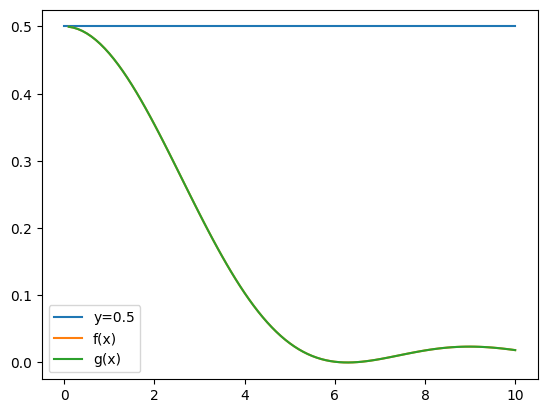

In [8]:
#Your code and answers here (don't forget to import matplotlib, and you can use the cos and sin from the math module
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return (1-np.cos(x))/x**2

x = np.linspace(0, 10, 101)[1:]
y = f(x)

plt.plot((0, 10), (0.5, 0.5), label='y=0.5') # y=0.5
plt.plot(x,y, label='f(x)')

print('f:', f(1.2*10**-8))

def g(x):
  return 2*(np.sin(x/2)**2)/x**2

print('g:', g(1.2*10**-8))

y = g(x)
plt.plot(x, y, label='g(x)')

plt.legend()
plt.show()

## Exercise 5: Floating points

- Write a Python code that converts single-precision (32-bit) floating point numbers from binary to decimal numbers, run the code for the single precision numbers `0 0000 0011 0111 1011 0000 0000 0000 000` and `1 0101 0101 0111 0110 0000 0000 0001 011`. [You recognise that these are single-precision by counting the numbers, 8 groups of 4 plus one to denote the sign. A floating point number means that it contains a '.' when expressed in decimal format.]

- Find the smallest possible (non-zero) single-precision floating-point number (so using 32-bits to identify the number in binary code, like the two examples above.)


In [9]:
def bin_to_dec(bin: str):
  bin = bin.replace(' ', '')

  signBit = int(bin[0])

  exponent = int(bin[1:9], 2)

  fractionBits = int(bin[9:], 2)
  fraction = float('1.' + str(fractionBits))

  return (-1)**signBit * 2**(exponent-127) * fraction

print(bin_to_dec('0 0000 0011 0111 1011 0000 0000 0000 000'))
print(bin_to_dec('1 0101 0101 0111 0110 0000 0000 0001 011'))

# Smallest number (all zeros, exponent and fraction as small as possible)
print(bin_to_dec('0 0000 0000 0000 0000 0000 0000 0000 000'))


6.59709246856619e-38
-3.1529077659797623e-13
5.877471754111438e-39
